In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
print('Orginal dataset:')
df.shape

Orginal dataset:


(435742, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
df_duplicate_rows = df[df.duplicated()]
df_duplicate_rows.shape

(674, 13)

In [ ]:
df.drop_duplicates(inplace = True)
print('After deleting duplicate rows:')
df.shape

After deleting duplicate rows:


(435068, 13)

In [ ]:
df.isnull().sum()   #Code to print the sum of null values in different columns.

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34632
no2                             16222
rspm                            40035
spm                            236908
location_monitoring_station     27303
pm2_5                          425754
date                                7
dtype: int64

In [ ]:
df['stn_code'] = df['stn_code'].fillna(0)
df['agency'] = df['agency'].fillna(0)
df.dropna(subset = ['location'],inplace = True)


In [ ]:
common_type = df['type'].mode()
df['type'] = df['type'].fillna(common_type[0])

In [ ]:
common_station = df['location_monitoring_station'].mode()
df['location_monitoring_station'] = df['location_monitoring_station'].fillna(common_station[0])

In [ ]:
df['location_monitoring_station'] = df['location_monitoring_station'].fillna(df['location_monitoring_station'].mode())

In [ ]:
df.isnull().sum()

stn_code                            0
sampling_date                       0
state                               0
location                            0
agency                              0
type                                0
so2                             34629
no2                             16219
rspm                            40032
spm                            236905
location_monitoring_station         0
pm2_5                          425751
date                                4
dtype: int64

In [ ]:
df.dropna(subset = ['date'],inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['so2','no2','rspm','spm']])
df[['so2','no2','rspm','spm']] = imputer.transform(df[['so2','no2','rspm','spm']])


In [ ]:
df.drop(['pm2_5'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
date                           0
dtype: int64

In [ ]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,108.872019,220.774796,Regional Office,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,108.872019,220.774796,Regional Office,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,108.872019,220.774796,Regional Office,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,108.872019,220.774796,Regional Office,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,108.872019,220.774796,Regional Office,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.000000,220.774796,"Inside Rampal Industries,ULUBERIA",2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.000000,220.774796,"Inside Rampal Industries,ULUBERIA",2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.000000,220.774796,"Inside Rampal Industries,ULUBERIA",2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.000000,220.774796,"Inside Rampal Industries,ULUBERIA",2015-12-24


In [ ]:
c = df.corr()
c

,so2,no2,rspm,spm
so2,1.000000,0.331957,0.141340,0.092572
no2,0.331957,1.000000,0.339581,0.220366
rspm,0.141340,0.339581,1.000000,0.468110
spm,0.092572,0.220366,0.468110,1.000000


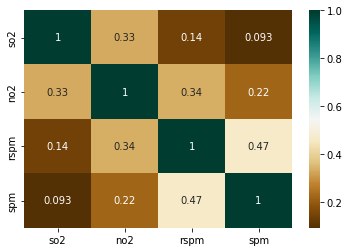

In [ ]:
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
df.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)

In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.872019,220.774796,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.872019,220.774796,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.872019,220.774796,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.872019,220.774796,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.872019,220.774796,1990-03-01


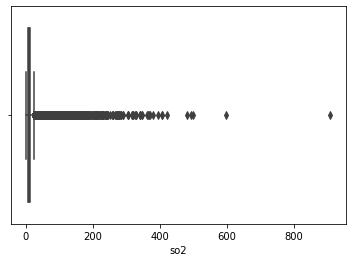

In [ ]:
sns.boxplot(x=df['so2'])

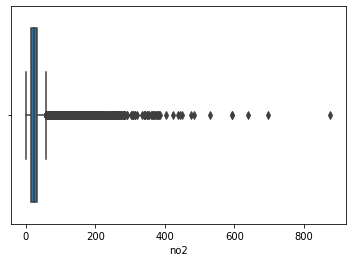

In [ ]:
sns.boxplot(x=df['no2'])

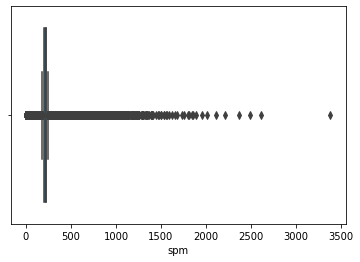

In [ ]:
sns.boxplot(x=df['spm'])

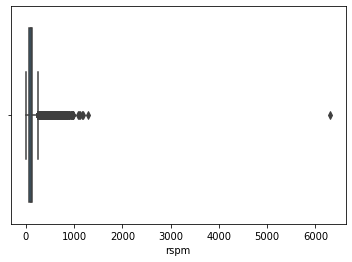

In [ ]:
sns.boxplot(x=df['rspm'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


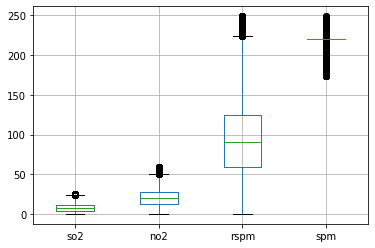

In [ ]:
df.boxplot(column = ['so2','no2','rspm','spm'])

In [ ]:
c = df.corr()
c

,so2,no2,rspm,spm
so2,1.000000,0.435980,0.241825,-0.067508
no2,0.435980,1.000000,0.373093,-0.009035
rspm,0.241825,0.373093,1.000000,0.035862
spm,-0.067508,-0.009035,0.035862,1.000000


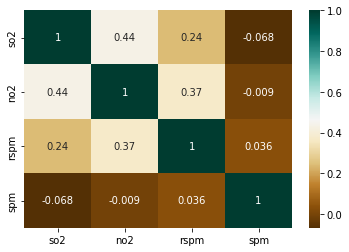

In [ ]:
sns.heatmap(c,cmap="BrBG",annot=True)


In [ ]:
state_wise = df.groupby(by = ['state']).sum()
state_wise['so2'].nlargest(3)

state
Maharashtra      414984.033612
Punjab           207607.418390
Uttar Pradesh    193152.682520
Name: so2, dtype: float64

In [ ]:
city_wise = df.groupby(by = ['location']).sum()
city_wise['no2'].nlargest(3)

location
Nagpur       129501.616593
Hyderabad    122699.103289
Jaipur       122072.591991
Name: no2, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
df['state_code'] = labelencoder_df.fit_transform(df['state'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,state,location,type,so2,no2,rspm,spm,date,state_code
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.872019,220.774796,1990-02-01,0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.872019,220.774796,1990-02-01,0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.872019,220.774796,1990-02-01,0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.872019,220.774796,1990-03-01,0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.872019,220.774796,1990-03-01,0
...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,220.774796,2015-12-15,32
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,220.774796,2015-12-18,32
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,220.774796,2015-12-21,32
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,220.774796,2015-12-24,32


In [ ]:
state = df['state'].unique()
state_code = df['state_code'].unique()
column = ['state_code']

In [ ]:
state_with_code = pd.DataFrame(data = state_code, index = state, columns = column)
state_with_code

,state_code
Andhra Pradesh,0
Arunachal Pradesh,1
Assam,2
Bihar,3
Chandigarh,4
Chhattisgarh,5
Dadra & Nagar Haveli,6
Daman & Diu,7
Delhi,8
Goa,9


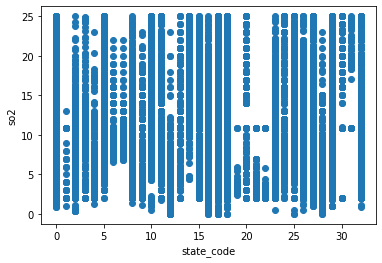

In [ ]:
plt.scatter(df['state_code'], df['so2'])
plt.xlabel('state_code')
plt.ylabel('so2')
plt.show()

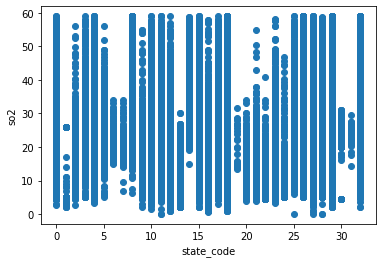

In [ ]:
plt.scatter(df['state_code'], df['no2'])
plt.xlabel('state_code')
plt.ylabel('so2')
plt.show()

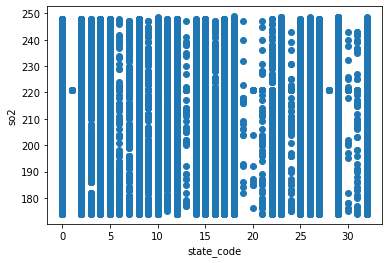

In [ ]:
plt.scatter(df['state_code'], df['spm'])
plt.xlabel('state_code')
plt.ylabel('so2')
plt.show()

In [ ]:
df_duplicate_rows = df[df.duplicated()]
df_duplicate_rows

,state,location,type,so2,no2,rspm,spm,date,state_code
2506,Andhra Pradesh,Hyderabad,Residential and others,4.9,32.0,88.0,243.000000,2005-07-01,0
13056,Andhra Pradesh,Visakhapatnam,"Residential, Rural and other Areas",4.0,28.0,54.0,220.774796,2010-08-19,0
18861,Andhra Pradesh,Khammam,"Residential, Rural and other Areas",4.0,17.0,61.0,220.774796,2013-06-06,0
18862,Andhra Pradesh,Khammam,"Residential, Rural and other Areas",4.0,19.0,60.0,220.774796,2013-09-06,0
18867,Andhra Pradesh,Khammam,"Residential, Rural and other Areas",4.0,17.0,65.0,220.774796,2013-06-29,0
...,...,...,...,...,...,...,...,...,...
408202,Uttar Pradesh,Lucknow,"Residential, Rural and other Areas",8.0,29.0,174.0,220.774796,2015-01-14,29
408925,Uttar Pradesh,Agra,Sensitive Area,2.0,14.0,172.0,220.774796,2015-09-29,29
419069,West Bengal,Haldia,Industrial Areas,10.1,45.1,130.0,231.000000,2007-12-01,32
419070,West Bengal,Haldia,Industrial Areas,12.0,42.9,162.0,228.000000,2007-01-15,32
